In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F



---


# **Recording link**:


---



---


[Maman12Q1 recording](https://drive.google.com/file/d/19sqzVI76XIymKfJa_DWv7a-9NrywAX6g/view?usp=sharing)



---


# **Question 1**

---



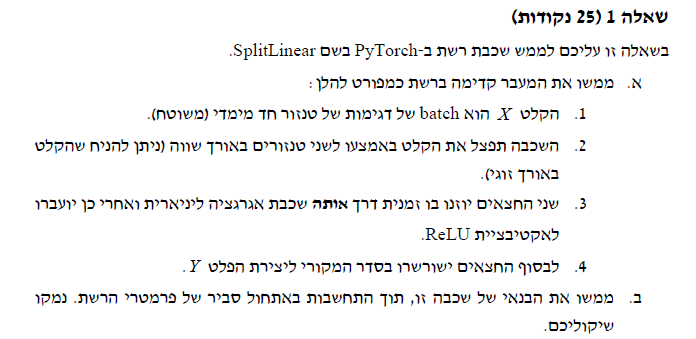

In [26]:
def init_weights(m):
      if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
        # m.bias.data.fill_(0.5)

In [27]:
class SplitLinear(nn.Module):
    def __init__(self, in_features, out_features = 1):
        super(SplitLinear, self).__init__()
        self.net = nn.Sequential()
        self.net.add_module("Linear", nn.Linear(in_features//2, out_features))
        self.net.add_module("ReLu", nn.ReLU())
        self.split_len = in_features//2

        # init net
        self.net.apply(init_weights)
        
    
    def forward(self, x):
      print("Shape of batch = ", x.shape)
      print("\n--------------------------------")
      splitted = torch.split(x, self.split_len, 1)
      print("Number of chunks = ", len(splitted))
      print("After split = ", splitted)
      
      print("Shape left side split = ", splitted[0].shape)
      print("Shape right side split = ", splitted[1].shape)
      
      print("\n--------------------------------")

      x1 = self.net(splitted[0])  
      print("First half net:", x1)

      x2 = self.net(splitted[1])  
      print("Second half:", x2)
      print("\n--------------------------------")

      y = torch.cat((x1, x2), 0)
      print("Result Shape:", y.shape, "Result:", y, sep='\n')
      return y


**Some sanity testing with torch.split()**

In [30]:
length1 = 12
sample1 = torch.randn(1, length1)

batch1 = sample1

print("Random 1D batch #1 BEFORE split:", batch1, "Batch #1 shape: ", batch1.shape, sep ='\n\n')

Random 1D batch #1 BEFORE split:

tensor([[-1.6080,  0.1803,  1.9775, -1.4934, -1.0400, -0.5129, -0.8364,  1.4596,
         -1.7739,  0.4271, -1.7913, -0.9286]])

Batch #1 shape: 

torch.Size([1, 12])


In [31]:
s1 = torch.split(batch1, length1//2, 1)

print("Random 1D batch #1 AFTER split:", s1, "Batch #1 shape AFTER split (1st half): ", s1[0].shape, "Batch #1 shape AFTER split (2nd half): ", s1[1].shape, sep ='\n\n')

Random 1D batch #1 AFTER split:

(tensor([[-1.6080,  0.1803,  1.9775, -1.4934, -1.0400, -0.5129]]), tensor([[-0.8364,  1.4596, -1.7739,  0.4271, -1.7913, -0.9286]]))

Batch #1 shape AFTER split (1st half): 

torch.Size([1, 6])

Batch #1 shape AFTER split (2nd half): 

torch.Size([1, 6])


In [32]:
sample2 = torch.randn(1, length1)
sample3 = torch.randn(1, length1)

batch2 = torch.cat((sample1,sample2, sample3), 0)

print("Random 2D batch #2 BEFORE split:", batch2, "Batch #2 shape: ", batch2.shape, sep ='\n\n')


Random 2D batch #2 BEFORE split:

tensor([[-1.6080,  0.1803,  1.9775, -1.4934, -1.0400, -0.5129, -0.8364,  1.4596,
         -1.7739,  0.4271, -1.7913, -0.9286],
        [ 0.6207,  2.2668, -0.0709,  1.5281,  0.5268,  1.1460,  0.6060,  1.0559,
          1.5410,  0.1118,  0.6441, -1.1495],
        [-1.5106,  0.9396, -0.5941,  0.2689, -0.4149, -1.6677,  0.2330, -0.3868,
         -1.1349, -0.4244,  0.4199,  0.0728]])

Batch #2 shape: 

torch.Size([3, 12])


In [33]:
s2 = torch.split(batch2, length1//2, 1)

print("Random 2D batch #2 AFTER split:", s2, "Batch #2 shape AFTER split (1st half): ", s2[0].shape, "Batch #2 shape AFTER split (2nd half): ", s2[1].shape, sep ='\n\n')

Random 2D batch #2 AFTER split:

(tensor([[-1.6080,  0.1803,  1.9775, -1.4934, -1.0400, -0.5129],
        [ 0.6207,  2.2668, -0.0709,  1.5281,  0.5268,  1.1460],
        [-1.5106,  0.9396, -0.5941,  0.2689, -0.4149, -1.6677]]), tensor([[-0.8364,  1.4596, -1.7739,  0.4271, -1.7913, -0.9286],
        [ 0.6060,  1.0559,  1.5410,  0.1118,  0.6441, -1.1495],
        [ 0.2330, -0.3868, -1.1349, -0.4244,  0.4199,  0.0728]]))

Batch #2 shape AFTER split (1st half): 

torch.Size([3, 6])

Batch #2 shape AFTER split (2nd half): 

torch.Size([3, 6])


## **Initialize SplitLinear**

In [34]:
net1 = SplitLinear(length1)

print(net1)

SplitLinear(
  (net): Sequential(
    (Linear): Linear(in_features=6, out_features=1, bias=True)
    (ReLu): ReLU()
  )
)


# **Forward pass**

In [35]:
res = net1.forward(batch2)

Shape of batch =  torch.Size([3, 12])

--------------------------------
Number of chunks =  2
After split =  (tensor([[-1.6080,  0.1803,  1.9775, -1.4934, -1.0400, -0.5129],
        [ 0.6207,  2.2668, -0.0709,  1.5281,  0.5268,  1.1460],
        [-1.5106,  0.9396, -0.5941,  0.2689, -0.4149, -1.6677]]), tensor([[-0.8364,  1.4596, -1.7739,  0.4271, -1.7913, -0.9286],
        [ 0.6060,  1.0559,  1.5410,  0.1118,  0.6441, -1.1495],
        [ 0.2330, -0.3868, -1.1349, -0.4244,  0.4199,  0.0728]]))
Shape left side split =  torch.Size([3, 6])
Shape right side split =  torch.Size([3, 6])

--------------------------------
First half net: tensor([[0.0000],
        [2.8647],
        [0.0000]], grad_fn=<ReluBackward0>)
Second half: tensor([[0.0000],
        [0.7562],
        [0.0000]], grad_fn=<ReluBackward0>)

--------------------------------
Result Shape:
torch.Size([6, 1])
Result:
tensor([[0.0000],
        [2.8647],
        [0.0000],
        [0.0000],
        [0.7562],
        [0.0000]], grad_f

In [36]:
print("Result after forward pass: ", res, sep="\n\n")

Result after forward pass: 

tensor([[0.0000],
        [2.8647],
        [0.0000],
        [0.0000],
        [0.7562],
        [0.0000]], grad_fn=<CatBackward0>)


---
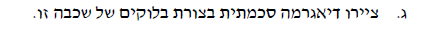


---



---



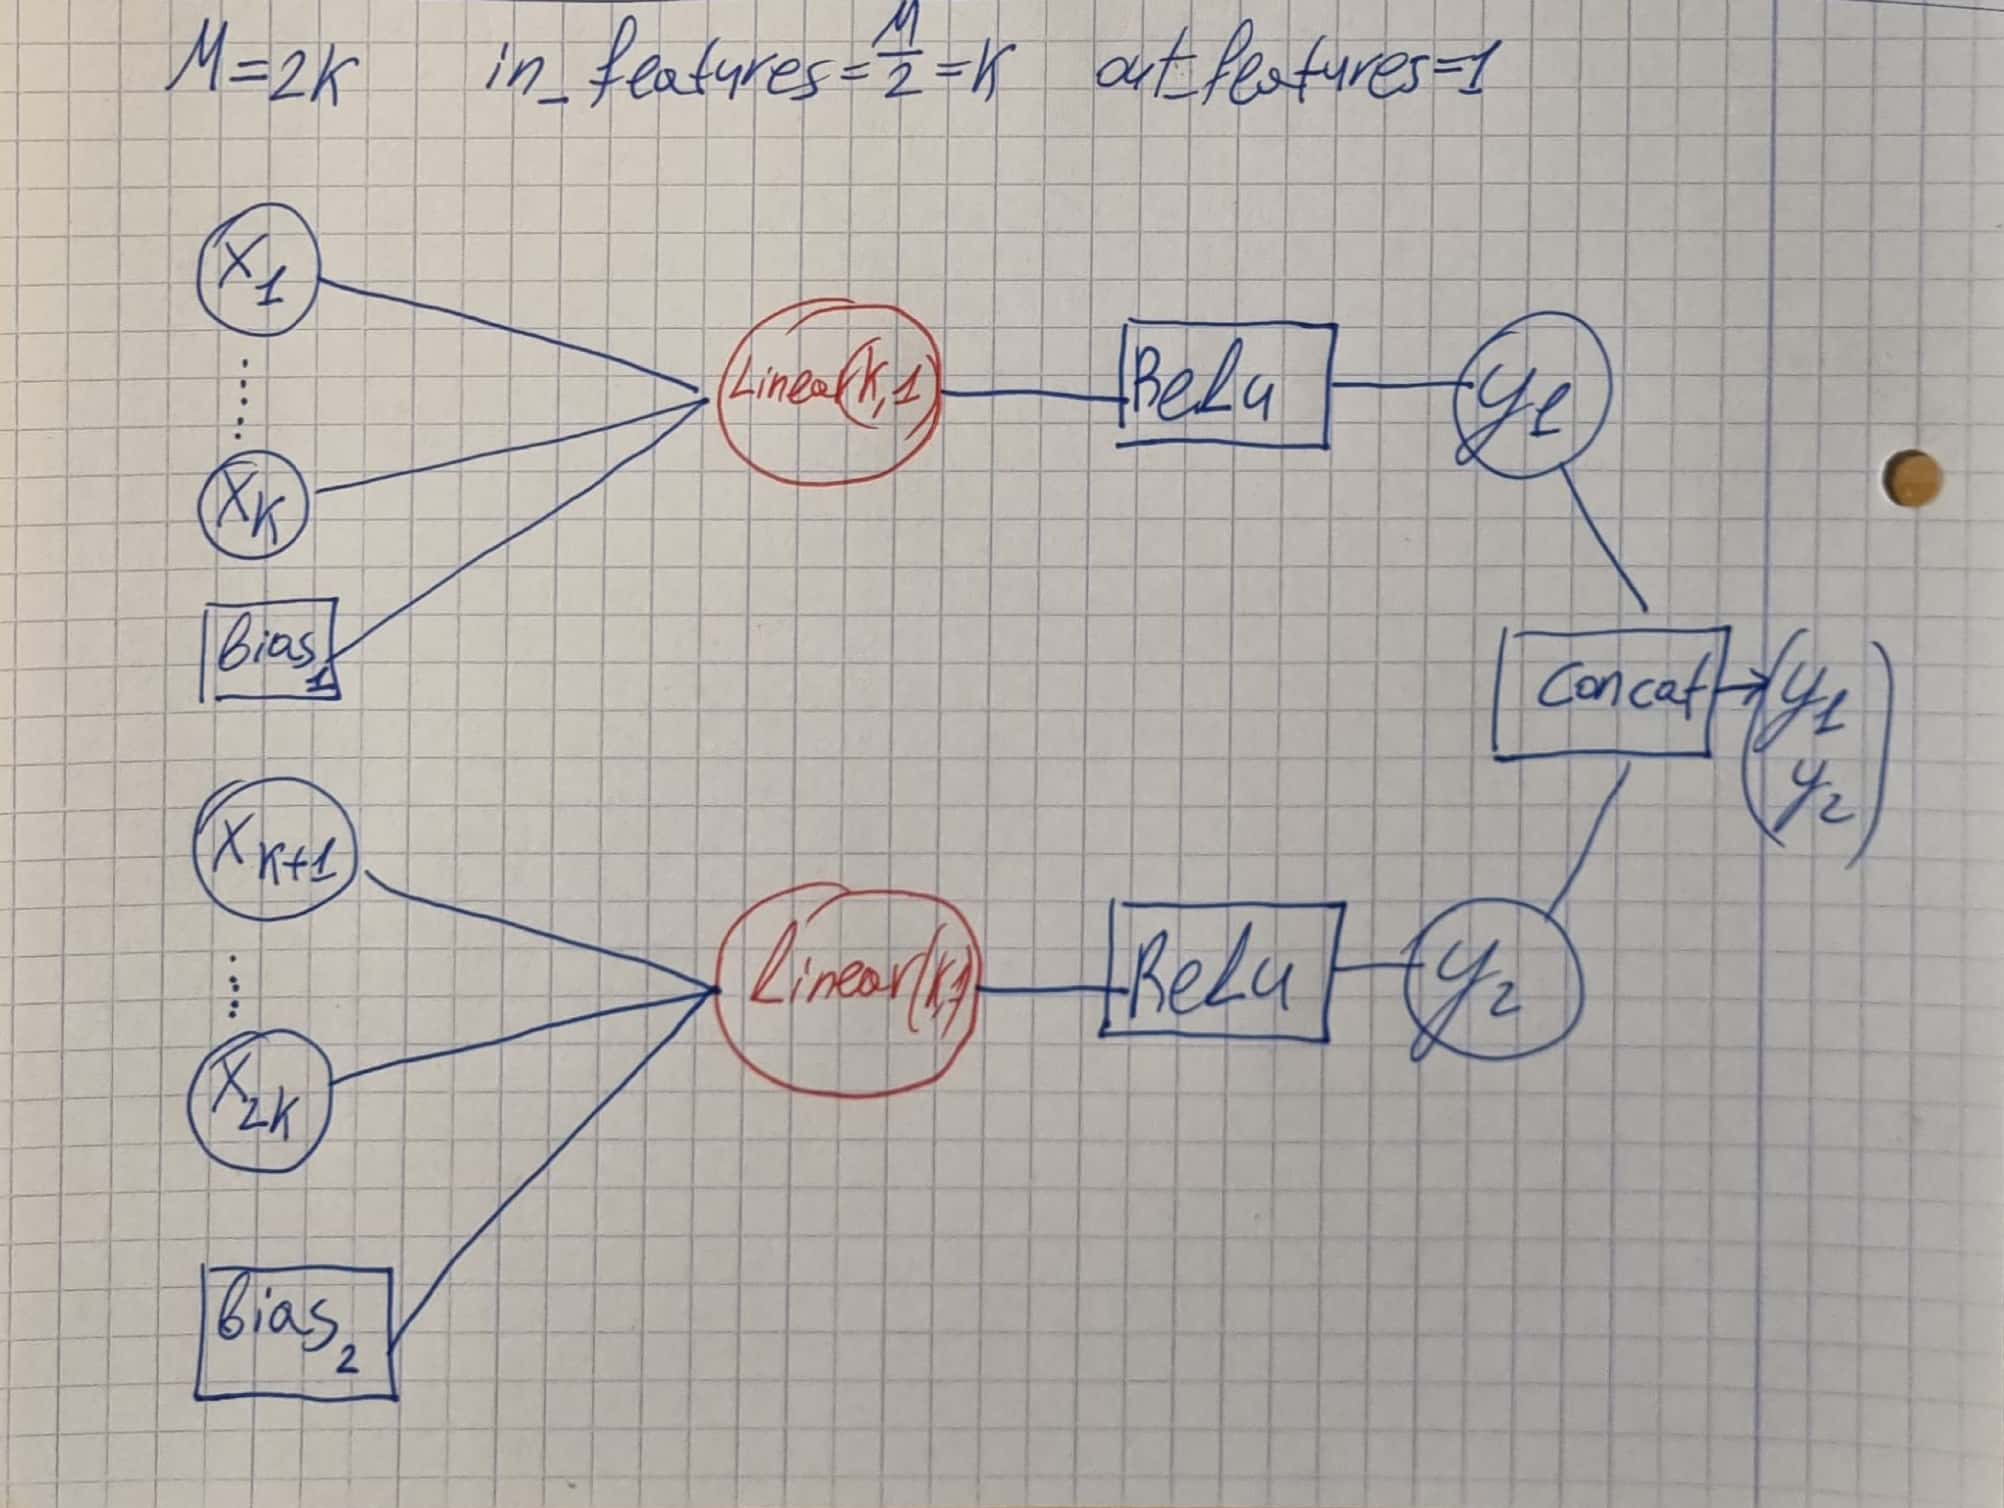

In [37]:
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace


  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-dnw762op
  Running command git clone -q https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-dnw762op
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4990 sha256=24faa23f66442dbcfa9fa3a2391ddc078d7b40f22f9e0381bed5814a1a6f9981
  Stored in directory: /tmp/pip-ephem-wheel-cache-fu0fvhx2/wheels/69/06/fd/652908d49c931cdcca96be3c727fb11ed777a3a62402210396
Successfully built torchviz


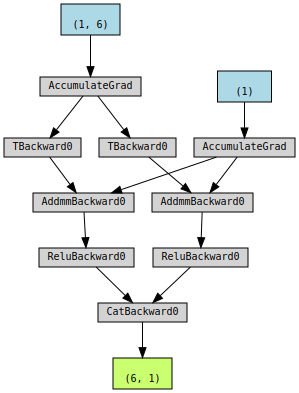

In [38]:
make_dot(res)

---
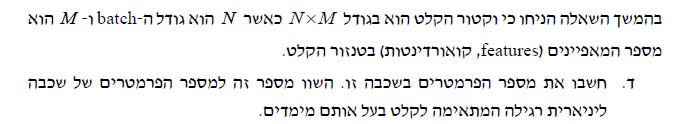


---



---



Given:

input_length = N

in_fetures = M

out_features per splitted half = 1

Total out_features = 2

From The learning guilde:

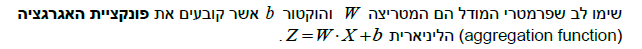

Number of parameters in SplitLinear= **M/2  + 1**


Number of parameters in a regular Linear layer = **M + 1**

---
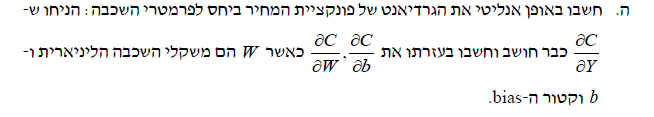

---

**According to the study guide:**

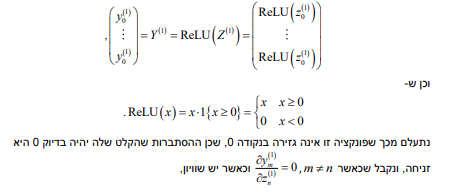

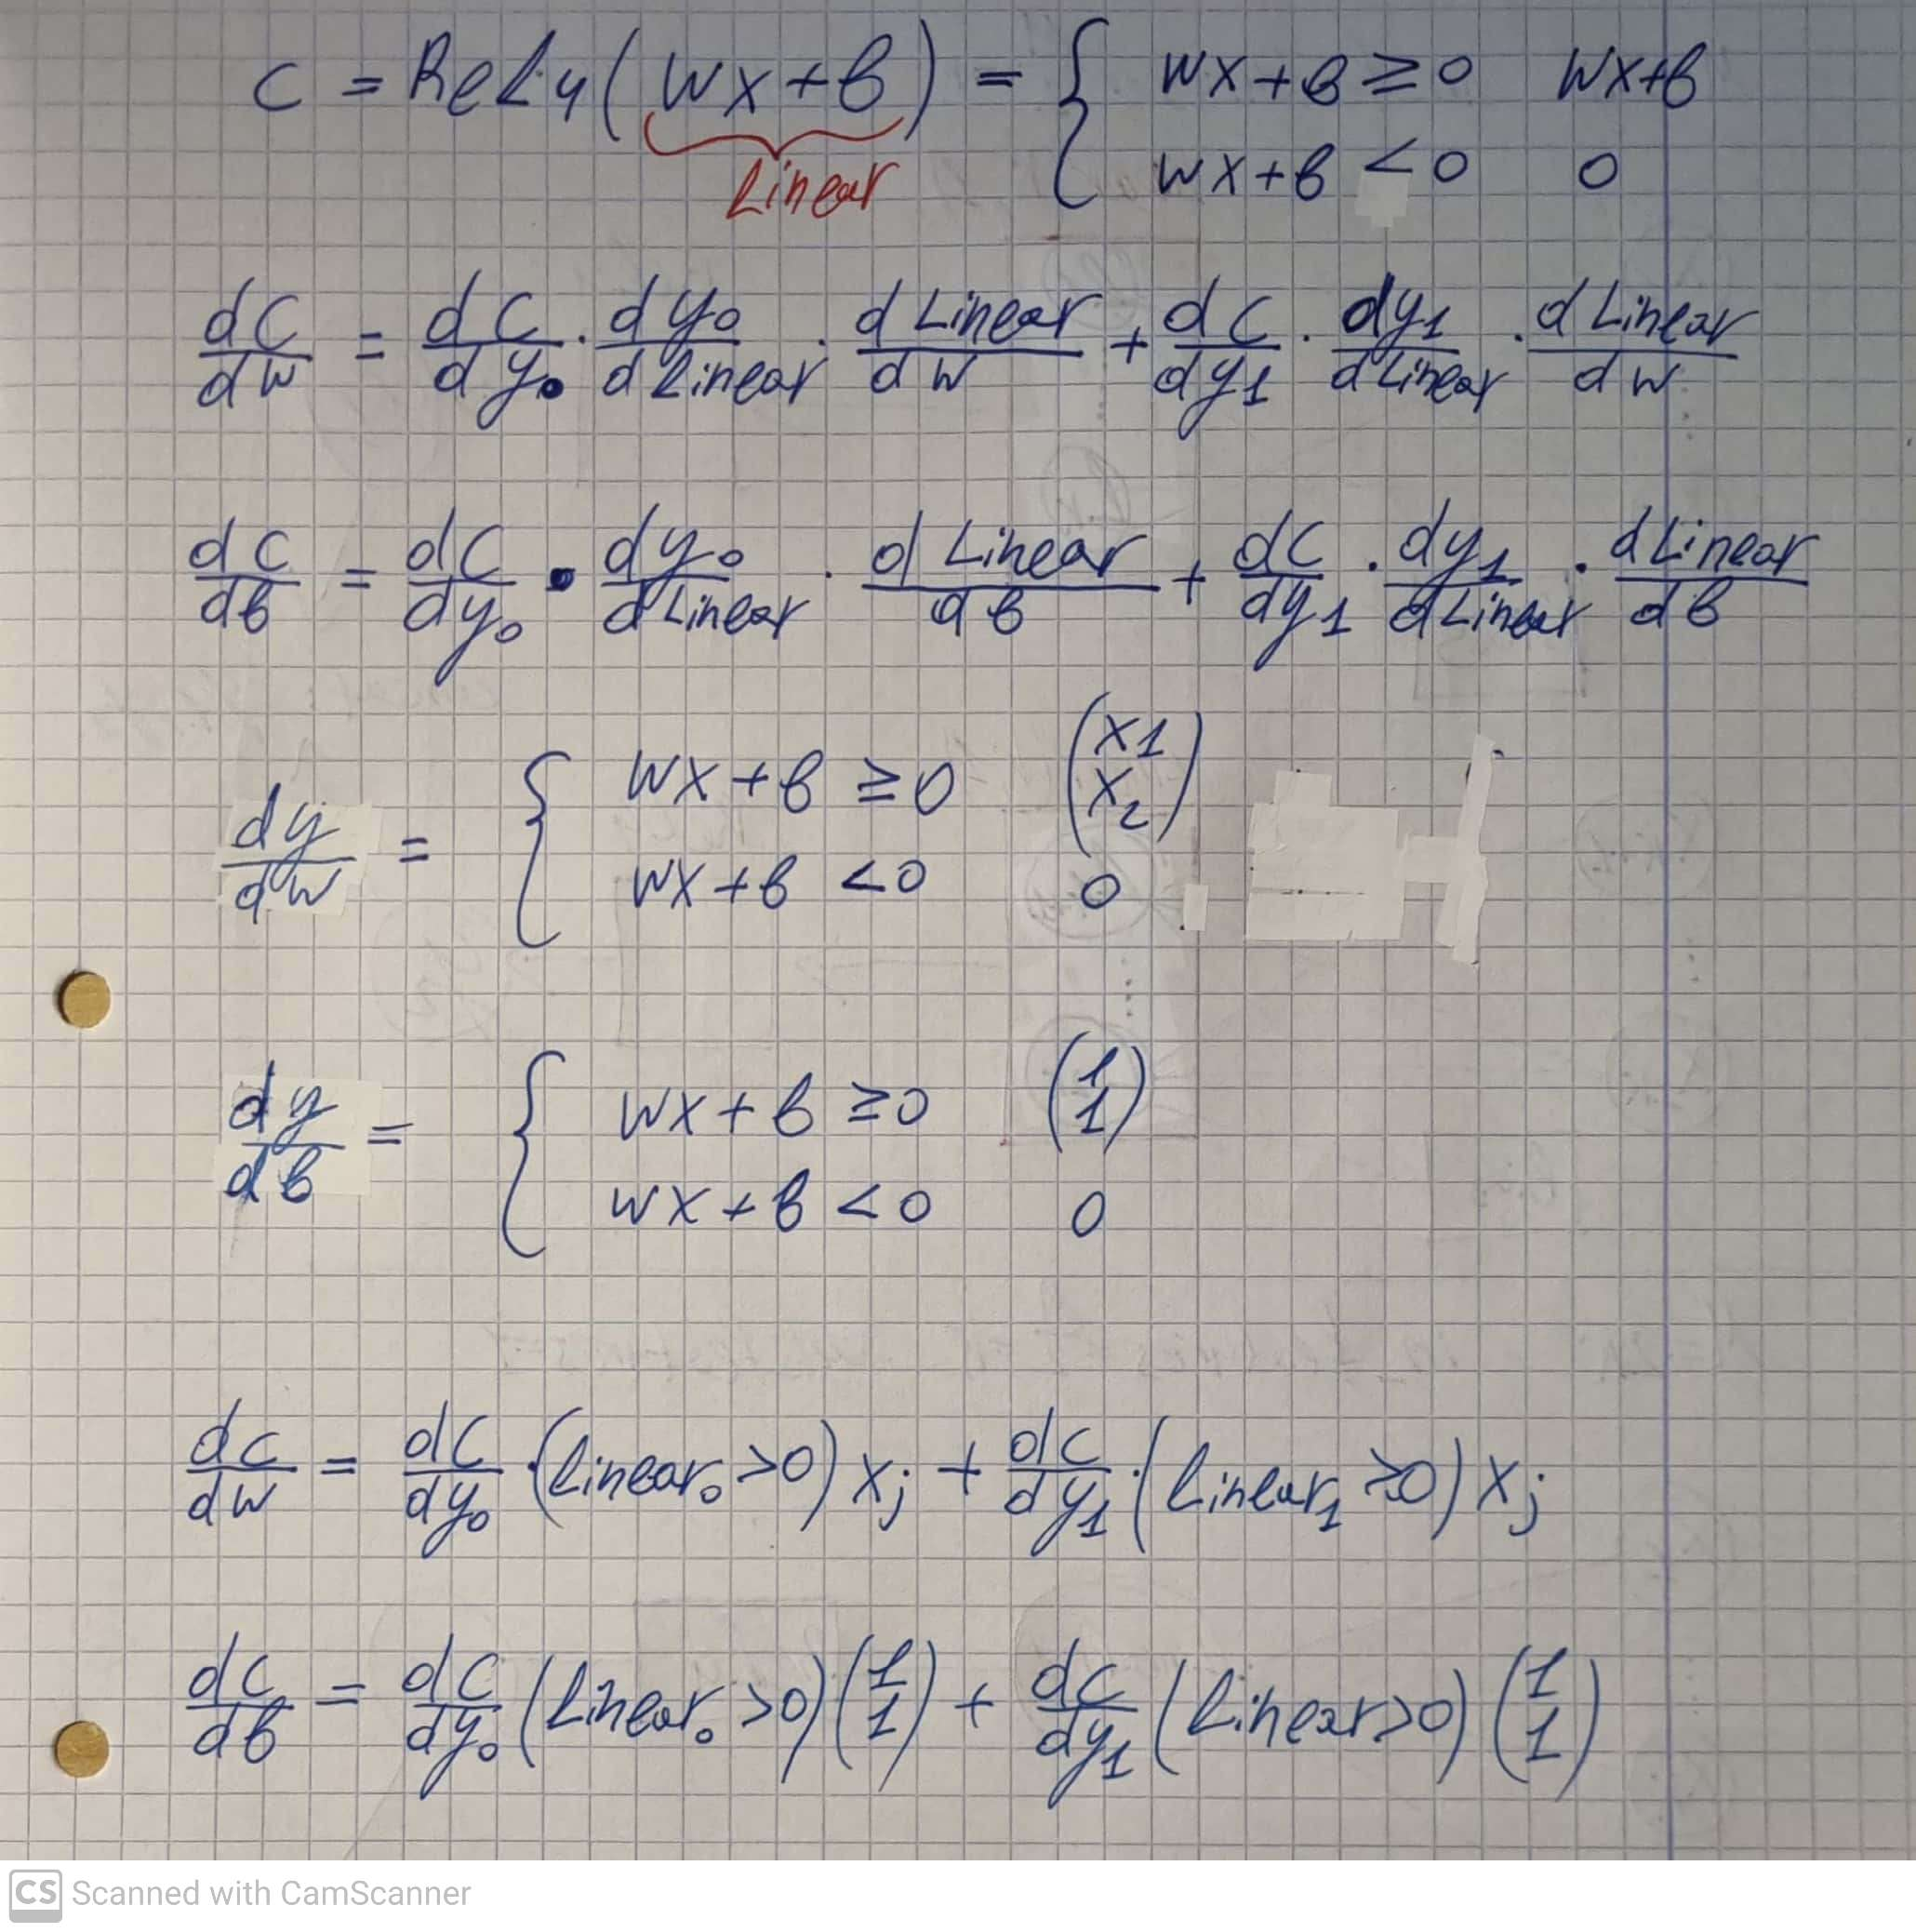



---

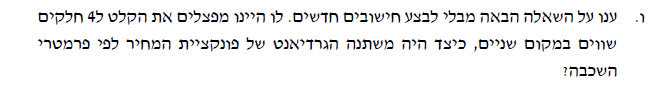

---

Similarly as in the previous section, but the derivative will consist of 4 additions instead of 2